# Removing Trends - Lab

## Introduction

In this lab, you'll practice your detrending skills!

## Objectives

You will be able to:
* Learn how to remove trends and seasonality
* Use a log transformation to minimize non-stationarity
* Use rolling means to reduce non-stationarity
* Use differencing to reduce non-stationarity

## Detrending the Airpassenger data

In [4]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('passengers.csv')
# Import passengers.csv and set it as a time-series object. Plot the TS
df.Month = pd.to_datetime(df.Month, format='%Y-%m-%d')
df.set_index('Month', inplace=True)
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


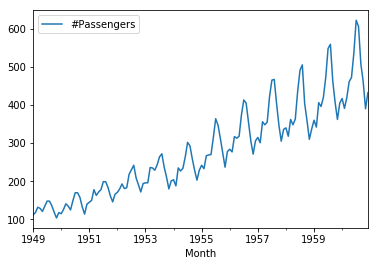

In [5]:
df.plot()

## Create a stationarity check

At this stage, we can use the code from previous labs to create a function `stationarity_check(ts)` that takes in a time series object and performs stationarity checks including rolling statistics and the Dickey Fuller test. 

We want the output of the function to:
- Plot the original time series along with the rolling mean and rolling standard deviation in one plot
- Output the results of the Dickey-Fuller test

In [38]:
# Create a function to check for the stationarity of a given timeseries using rolling stats and DF test
# Collect and package the code from previous lab
def stationarity_check(TS):
    
    # Import adfuller
    from statsmodels.tsa.stattools import adfuller
    
    # Calculate rolling statistics
    rolmean = TS.rolling(window = 8, center = False).mean()
    rolstd = TS.rolling(window = 8, center = False).std()
    
    # Perform the Dickey Fuller Test
    dftest = adfuller(TS) # change the passengers column as required 
    
    #Plot rolling statistics:
    fig = plt.figure(figsize=(12,6))
    orig = plt.plot(TS, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print ('Results of Dickey-Fuller Test:')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
    return None

Use your newly created function on the airpassenger data set.

C:\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


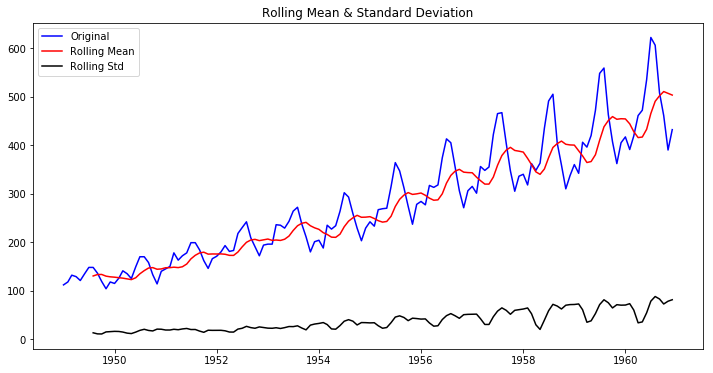

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [7]:
stationarity_check(df)

## Perform a log() and sqrt() transform

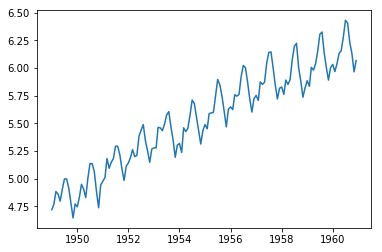

In [26]:
# Log transform timeseries and compare with original to check the effect
import numpy as np
data = pd.Series(df['#Passengers'])
log_data = pd.Series(np.log(data))
plt.plot(log_data)

moving forward, let's keep working with the log transformed data before subtracting rolling mean, differencing, etc.

## Subtracting the rolling mean

Create a rolling mean using your log transformed time series, with a time window of 7. Plot the log-transformed time series and the rolling mean together.

In [41]:
rolmean = log_data.rolling(window = 7, center = False).mean()
#rolstd = TS.rolling(window = 8, center = False).std()

data_minus_rolmean = log_data - rolmean
data_minus_rolmean.head(15)

# Drop the NaN values from timeseries calculated above
data_minus_rolmean.dropna(inplace=True)


Now, subtract the rolling mean from the time series, look at the 10 first elements of the result and plot the result.

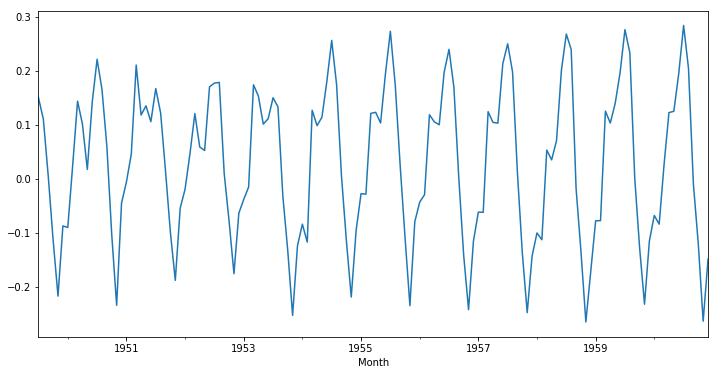

In [42]:
# Plot the result
data_minus_rolmean.plot(figsize=(12,6))

Finally, use your function `check_stationarity` to see if this series is considered stationary!

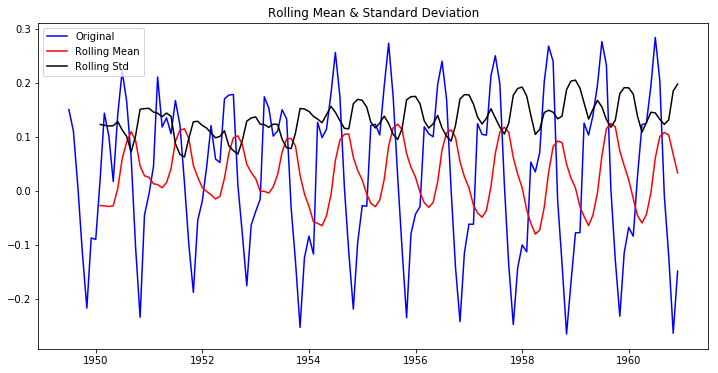

Results of Dickey-Fuller Test:
Test Statistic                  -2.348027
p-value                          0.156946
#Lags Used                      14.000000
Number of Observations Used    123.000000
Critical Value (1%)             -3.484667
Critical Value (5%)             -2.885340
Critical Value (10%)            -2.579463
dtype: float64


In [43]:
stationarity_check(data_minus_rolmean)

### Based on the visuals and on the Dickey-Fuller test, what do you conclude?


In [ ]:
# The series now looks stationaty on the plot. The result of the test is 0.15, which means we cannot
# reject the null hypothesis that the series in not stationary

## Subtracting the weighted rolling mean

Repeat all the above for the *weighter* rolling mean. Start from the log-transformed data again. Compare the Dickey-Fuller Test results. What do you conclude?

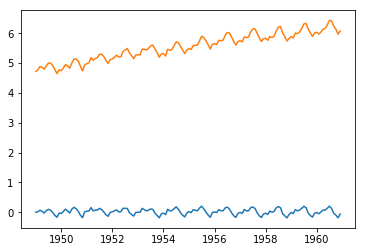

In [55]:
# Use Pandas ewma() to calculate Weighted Moving Average of ts_log
log_data.head()
w_data = log_data.ewm(halflife = 2).mean()
w_df = log_data - w_data
w_df.head(15)

# Plot the original data with exp weighted average
plt.plot(w_df)
plt.plot(log_data)

In [11]:
# Subtract the moving average from the original data and plot

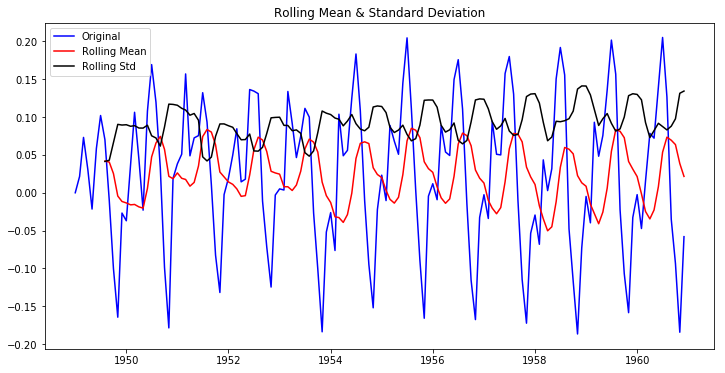

Results of Dickey-Fuller Test:
Test Statistic                  -3.087696
p-value                          0.027477
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [56]:
stationarity_check(w_df)

### Based on the visuals and on the Dickey-Fuller test, what do you conclude?


In [ ]:
#  weighted rolling mean turned out to be effective at removing the trend from the data

## Differencing

Using exponentially weighted moving averages, we seem to have removed the upward trend, but not the seasonality issue. Now use differencing to remove seasonality. Make sure you use the right amount of `periods`. Start from the log-transformed, exponentially weighted rolling mean-subtracted series.

After you differenced the series, run the `stationarity check` again.

In [58]:
# difference your data and look at the head
data_diff = w_df.diff(periods=1)
data_diff.head()

Month
1949-01-01         NaN
1949-02-01    0.021616
1949-03-01    0.051525
1949-04-01   -0.042575
1949-05-01   -0.052119
Name: #Passengers, dtype: float64

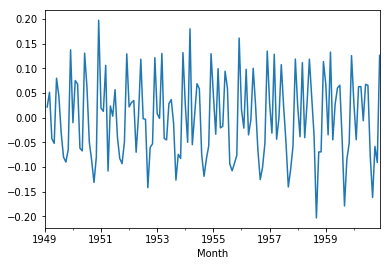

In [59]:
# plot your differenced time series
data_diff.plot()

In [61]:
# drop nas
data_diff.dropna(inplace=True)


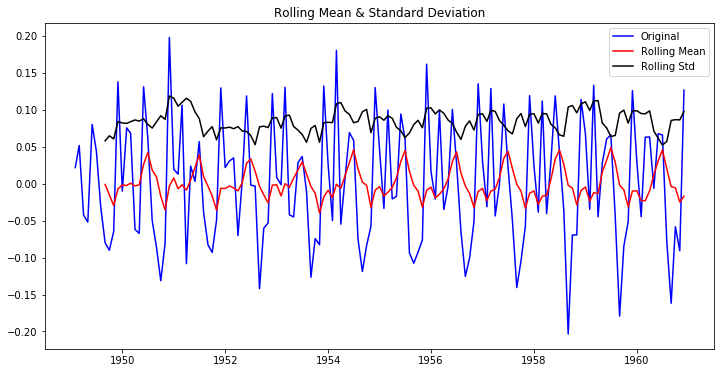

Results of Dickey-Fuller Test:
Test Statistic                  -4.042240
p-value                          0.001205
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [62]:
stationarity_check(data_diff)

### Your conclusion

In [ ]:
# This is the most 'trend-less' series

## Summary 

In this lab, you learned how to make time series stationary through using log transforms, rolling means and differencing.